# 华为软件精英挑战赛——编程闯关

## 读取数据

读取提供数据(.txt文件)，探查数据内容

In [2]:
# 导入相关库
import os
import numpy as np

In [3]:
# 显示当前工作路径
# jupyter notebook 只能打开当前目录下的数据集
# 所以需要将数据集upload到当前目录下
os.getcwd()

'C:\\Users\\Xyao\\Desktop\\华为软件精英挑战赛\\热身赛\\编程闯关\\参考代码\\Coding_Xyao'

In [4]:
# 定义一个数据读取函数
def loadDataSet(filename, label_existed_flag):
    '''
    filename: 需要读取的文件路径
    label_existed_flag: 用于区分训练集文件/测试集文件；取值1/0；
                                      1表明存在label,为训练集；
                                      0表明不存在label,为测试集
    '''
    feats = []          # 保存features, 但数据文件中并未明确阐述每一列的属性（比如不知道数据是表示性别、年龄等），已经做了归一化处理
    labels = []        # 保存labels, 即每一条样本对应的label（此处为二分类，只有0/1）
    with open(filename, 'r') as fr:   # 使用with open会自动调用close()
        lines = fr.readlines()
        for line in lines:
            temp = []
            allInfo = line.strip().split(',')
            dims = len(allInfo)
            if label_existed_flag == 1:
                for index in range(dims-1):
                    temp.append(float(allInfo[index]))
                feats.append(temp)
                labels.append(float(allInfo[dims-1]))
            else:
                for index in range(dims):
                    temp.append(float(allInfo[index]))
                feats.append(temp)
        feats = np.array(feats)
        labels = np.array(labels)
    return feats, labels

In [5]:
# 读取训练集数据train_data.txt
train_file =  "train_data.txt"
train_feats, train_labels = loadDataSet(train_file, 1)

In [6]:
# 读取测试集数据test_data.txt
test_file = "test_data.txt"
test_feats, _ = loadDataSet(test_file, 0)

In [7]:
# 读取测试集真实标签answer.txt
answer_file = "answer.txt"
test_labels = []
with open(answer_file, 'r') as fr:
    lines = fr.readlines()
    for line in lines:
        test_labels.append(int(float(line.strip())))
test_labels = np.array(test_labels)

In [8]:
# 打印数据集形状
print("======打印训练集尺寸======")
print("训练集特征尺寸:  " + str(train_feats.shape))
print("训练集标签尺寸:  " + str(train_labels.shape))

print("======打印测试集尺寸======")
print("测试集特征尺寸:  " + str(test_feats.shape))
print("测试集真实标签尺寸:  " + str(test_labels.shape))

======打印训练集尺寸======
训练集特征尺寸:  (8000, 1000)
训练集标签尺寸:  (8000,)
======打印测试集尺寸======
测试集特征尺寸:  (2000, 1000)
测试集真实标签尺寸:  (2000,)


In [9]:
# 统计训练集中0/1样本数
# 查看数据集是否平衡
from collections import Counter
labels_info = Counter(train_labels)

print("标签为0的样本数为：%d " % labels_info[0])
print("标签为1的样本数为：%d " % labels_info[1])


标签为0的样本数为：5051 
标签为1的样本数为：2949 


In [10]:
# 打印5条样本
for i in range(5):
    print("第%d样本: "%(i+1))
    print("训练集: " + str(train_feats[i, :10]))
    print("标签: %d" % train_labels[i])


第1样本: 
训练集: [0.239 0.079 0.934 0.131 0.024 0.748 0.951 0.922 0.858 0.475]
标签: 0
第2样本: 
训练集: [0.972 0.852 0.33  0.114 0.003 0.383 0.192 0.18  0.86  0.654]
标签: 0
第3样本: 
训练集: [0.118 0.368 0.989 0.331 0.944 0.539 0.118 0.867 0.351 0.956]
标签: 0
第4样本: 
训练集: [0.044 0.476 0.882 0.202 0.445 0.29  0.162 0.62  0.428 0.61 ]
标签: 0
第5样本: 
训练集: [0.199 0.242 0.322 0.081 0.695 0.206 0.052 0.732 0.268 0.82 ]
标签: 0


## 使用逻辑回归进行分类

直接利用sklearn中的逻辑回归模型进行训练，便于快速查看分类效果

In [18]:
# 在ipython环境(jupyter基于ipyhon)下直接显示图片
%matplotlib inline

In [19]:
# 支持中文和坐标轴字符的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [20]:
from sklearn.linear_model import LogisticRegression

[[1068  306]
 [  81  545]]


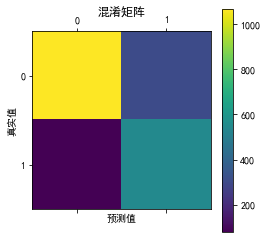

In [21]:
LR = LogisticRegression(penalty='l1', class_weight='balanced', random_state=42, solver='saga')
LR.fit(train_feats, train_labels)
test_pre = LR.predict(test_feats)

# 二元分类分类指标
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 预测值 与 真实值
confusion_matrix = confusion_matrix(test_labels, test_pre)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title("混淆矩阵")
plt.colorbar()
plt.ylabel("真实值")
plt.xlabel("预测值")
plt.show()


In [22]:
# 给出 precision    recall  f1-score 

from sklearn.metrics import classification_report
print(classification_report(test_labels, test_pre))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1374
           1       0.64      0.87      0.74       626

    accuracy                           0.81      2000
   macro avg       0.78      0.82      0.79      2000
weighted avg       0.84      0.81      0.81      2000



## 使用lightgbm进行分类

In [23]:
# 如果没安装过lightgbm，则需要运行该语句进行安装，安装后需重启kernel
# pip install lightgbm

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [11]:
import lightgbm as lgb

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
# 训练数据集切分，取其中20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(train_feats, train_labels, test_size=0.2, random_state=42)
print("Train data length:", len(X_train))
print("Test data length:", len(X_test))

Train data length: 6400
Test data length: 1600


In [16]:
# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [27]:
# 参数
params = {'num_leaves': 500, #结果对最终效果影响较大，越大值越好，太大会出现过拟合
          'min_data_in_leaf': 10,
          'objective': 'binary', #定义的目标函数
          'max_depth': -1,
          'learning_rate': 0.1,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,  #提取的特征比率
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
         # "lambda_l1": 0.1,             #l1正则
          'lambda_l2': 0.1,     #l2正则
          "verbosity": -1,
          "nthread": -1,                #线程数量，-1表示全部线程，线程越多，运行的速度越快
          'metric': {'binary_logloss', 'auc'},  ##评价函数选择
          "random_state": 42, #随机数种子，可以防止每次运行的结果不一致
          # 'device': 'gpu' ##如果安装的事gpu版本的lightgbm,可以加快运算
          }

In [30]:
# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval, early_stopping_rounds=200)

# 模型保存
gbm.save_model('model.txt')

# 模型加载
gbm = lgb.Booster(model_file='model.txt')

# 模型预测
test_pred = gbm.predict(test_feats, num_iteration=gbm.best_iteration)

# 模型评估
print('The rmse of prediction is:', mean_squared_error(test_labels, test_pred) ** 0.5)

[1]	valid_0's binary_logloss: 0.661521	valid_0's auc: 0.505348
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.659863	valid_0's auc: 0.527891
[3]	valid_0's binary_logloss: 0.660068	valid_0's auc: 0.535671
[4]	valid_0's binary_logloss: 0.662846	valid_0's auc: 0.522805
[5]	valid_0's binary_logloss: 0.663379	valid_0's auc: 0.524377
[6]	valid_0's binary_logloss: 0.664007	valid_0's auc: 0.527486
[7]	valid_0's binary_logloss: 0.663933	valid_0's auc: 0.534353
[8]	valid_0's binary_logloss: 0.665414	valid_0's auc: 0.530046
[9]	valid_0's binary_logloss: 0.666001	valid_0's auc: 0.528711
[10]	valid_0's binary_logloss: 0.665646	valid_0's auc: 0.530524
[11]	valid_0's binary_logloss: 0.667722	valid_0's auc: 0.528428
[12]	valid_0's binary_logloss: 0.667971	valid_0's auc: 0.528263
[13]	valid_0's binary_logloss: 0.668239	valid_0's auc: 0.52861
[14]	valid_0's binary_logloss: 0.66751	valid_0's auc: 0.533097
[15]	valid_0's binary_logloss: 0.66828	valid_0's auc:

In [32]:
# TODO: lightGBM参数调节